In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [82]:
data = pd.read_csv(r"D:\Lomba-Lomba\TSDN 2024\COPD\dataset.csv")

## **EDA**

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.columns

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize=[20,20])
plt.show

In [ ]:
data.columns

In [ ]:
import seaborn as sns
sns.boxplot(data['AGE'])

In [ ]:
data_corr = data[['AGE', 'PackHistory', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD']]
matrix = data_corr.corr()
# Menentukan ukuran figur
plt.figure(figsize=(15, 10))  # Anda bisa mengubah angka sesuai kebutuhan
# Plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)
plt.show()

## **Menggunakan 6 Variabel**

In [83]:
data = data[["FEV1PRED","AGE", "MWT1Best", "SGRQ", "smoking", "copd"]]

In [84]:
data["copd"].value_counts()

copd
2    43
3    27
1    23
4     8
Name: count, dtype: int64

c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='copd', ylabel='Count'>

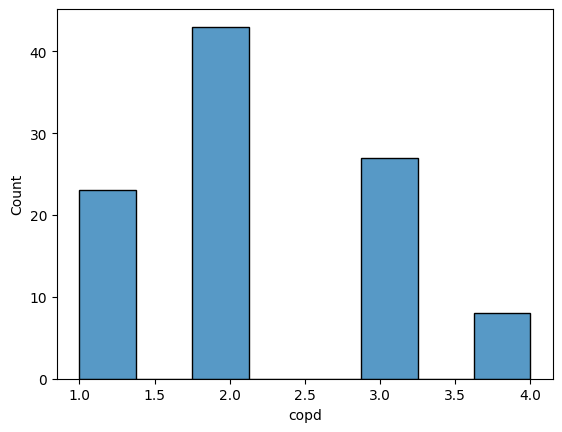

In [85]:
sns.histplot(data["copd"])

### Pemindahan Kelas 3 ke kelas 4

In [86]:
# Mengubah nilai 4 menjadi 3 di kolom 'copd'
data["copd"] = data["copd"].replace(4, 3)

# Menampilkan distribusi nilai yang baru
print(data["copd"].value_counts())

copd
2    43
3    35
1    23
Name: count, dtype: int64


c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='copd', ylabel='Count'>

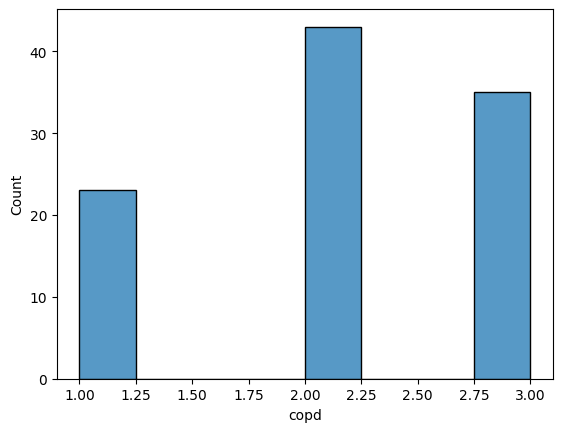

In [87]:
sns.histplot(data["copd"])

## SMOTE Random Forest

In [ ]:
from imblearn.over_sampling import SMOTE

data = data.dropna()
X = data.drop(["copd"], axis = 1)
y = data["copd"]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = RobustScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)

# Initialize and fit the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
sns.histplot(y_train_resampled)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## SMOTE XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = RobustScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model using resampled data
xg.fit(X_train_resampled, y_train_resampled)

# Make predictions
xg_preds = xg.predict(X_test)

# Print classification report
print(classification_report(y_test, xg_preds))


# **FIX ANALISIS**

# Reverse XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Encode the target variable to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Akan mengubah [1, 2, 3] menjadi [0, 1, 2]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = RobustScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model using resampled data
xg.fit(X_train_resampled, y_train_resampled)

# Make predictions
xg_preds = xg.predict(X_test)

# Reverse encoding hasil prediksi untuk mendapatkan label asli
xg_preds_original = label_encoder.inverse_transform(xg_preds)

# Reverse encoding y_test jika Anda ingin menggunakan label asli dalam analisis
y_test_original = label_encoder.inverse_transform(y_test)

# Print classification report with original labels
print(classification_report(y_test_original, xg_preds_original))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        10

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



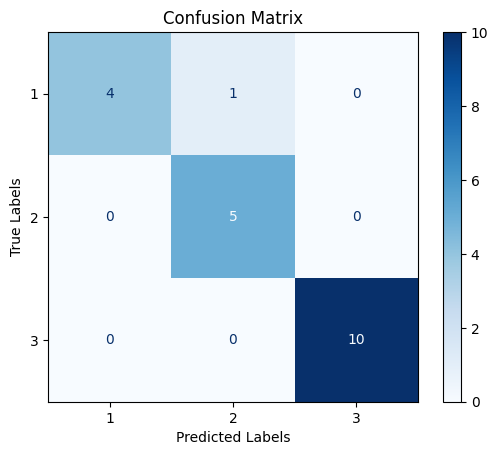

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_original, xg_preds_original)

# Menampilkan confusion matrix dalam bentuk grafik
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# EKSPOR MODEL
### Format .joblib

In [ ]:
import joblib

# Tentukan path dan nama file untuk menyimpan model
model_path = "./Output_Model/xgboost_model.joblib"
# Simpan model
joblib.dump(xg, model_path)
print(f"Model saved to {model_path}")

Model saved to ./Output_Model/xgboost_model.joblib


## Gunakan Model 

In [ ]:
import joblib
import numpy as np

# Tentukan path dan nama file untuk menyimpan model
model_path = "./Output_Model/xgboost_model.joblib"

# Muat model
loaded_model = joblib.load(model_path)

# Contoh data untuk prediksi (misalnya, ambil satu sample dari X_test)
sample_data = X_test[0].reshape(1, -1)  # Pastikan data berbentuk 2D

# Lakukan prediksi
predicted_label = loaded_model.predict(sample_data)

# Jika Anda telah menggunakan LabelEncoder untuk y, pastikan untuk mengembalikan label asli
predicted_label_original = label_encoder.inverse_transform(predicted_label)

print(f"Predicted label: {predicted_label_original[0]}")

Predicted label: 3


In [99]:
# CEK UNTUK DATA TEST, ambil 90 % dari data test
import numpy as np

# Tentukan 10% sampel dari X_test
num_samples = int(0.9 * len(X_test))
X_validation = X_test[:num_samples]

# Lakukan prediksi pada data validasi
validation_predictions = loaded_model.predict(X_validation)

# Jika label asli diubah menggunakan LabelEncoder, kembalikan prediksi ke label asli
validation_predictions_original = label_encoder.inverse_transform(validation_predictions)

# Tampilkan hasil prediksi
print("Prediksi untuk data validasi (90% dari X_test):")
print(validation_predictions_original)


Prediksi untuk data validasi (90% dari X_test):
[3 3 1 2 2 1 3 1 3 3 3 3 2 2 1 3 2 2]


# **KODE DIBAWAH INI HANYA PERCOBAAN**

## Random Forest

In [ ]:
data = data.dropna()
X = data.drop(["copd"], axis = 1)
y = data["copd"]

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# feature scaling
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model
xg.fit(X_train, y_train)

# Make predictions
xg_preds = xg.predict(X_test)

# Print classification report
print(classification_report(y_test, xg_preds))


# Confussion Matriks

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, xg_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save model terbaik
import joblib
import h5py

# Fit the model dan menyimpan model terbaik
xg.fit(X_train, y_train, early_stopping_rounds=10, 
       eval_set=[(X_test, y_test)], 
       eval_metric='logloss', verbose=True)

# Mengekspor model XGBoost ke file .model terlebih dahulu
xg.save_model("best_model.model")

# Kemudian konversi ke format .h5
model_filename = "best_model.h5"
with h5py.File(model_filename, 'w') as f:
    joblib.dump(xg, f)

print(f"Model berhasil diekspor ke {model_filename}")
